# CS 534 - Machine Learning 
## PS4
### Mostofa Najmus Sakib
### St. Id: 114102108

In [52]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.cluster import KMeans

import scipy.spatial

### Question1(10pts) 

Use K-means from scikit learn to estimate the best number of clusters.

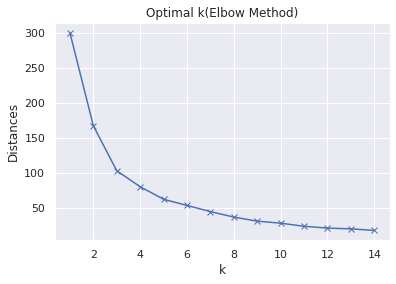

In [53]:
data_iris = load_iris()
data_iris_x = data_iris.data[:, :2]
ss = StandardScaler()
data_iris_x_std= ss.fit_transform(data_iris_x)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_iris_x_std)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distances')
plt.title('Optimal k(Elbow Method)')
plt.show()

* For each k value, we initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre
* When k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.
* If the plot looks like an arm, then the elbow on the arm is optimal k.
* In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3
* This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [54]:
from sklearn.metrics import silhouette_score
silhouettes=[]
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_iris_x_std)
    silhouettes.append(silhouette_score(data_iris_x_std,kmeanModel.predict(data_iris_x_std)))

In [55]:
silhouettes

[0.44787107939629056,
 0.4343127417099665,
 0.3991330900455376,
 0.4010118864127862,
 0.39534659999332167,
 0.41468855641569485,
 0.4118370285535923,
 0.42868331637908064]

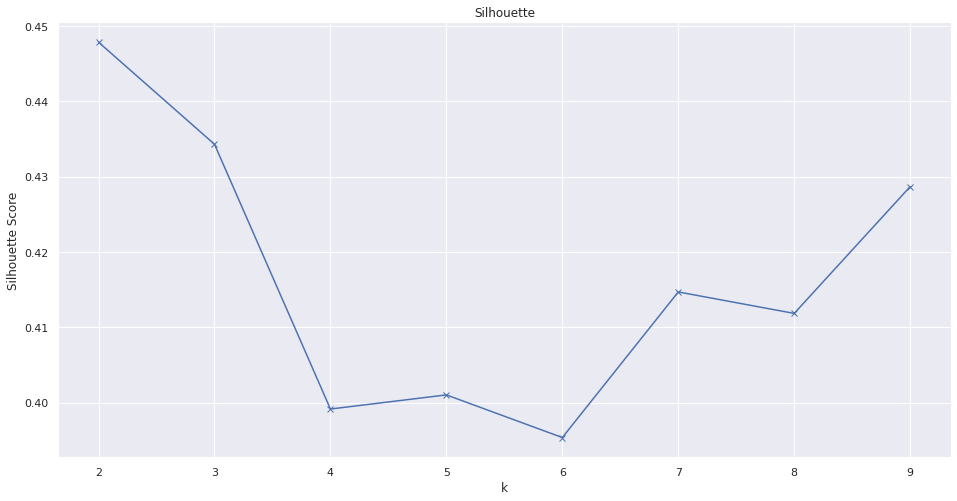

In [56]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

Since we will take the highest Silhouette Score, so for the above example we have the cluster 2 as the best number of clusters

In [57]:
X,y=iris['data'],iris['target']
X=StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z=pca.fit_transform(X)

Text(0.5, 1.0, 'Target')

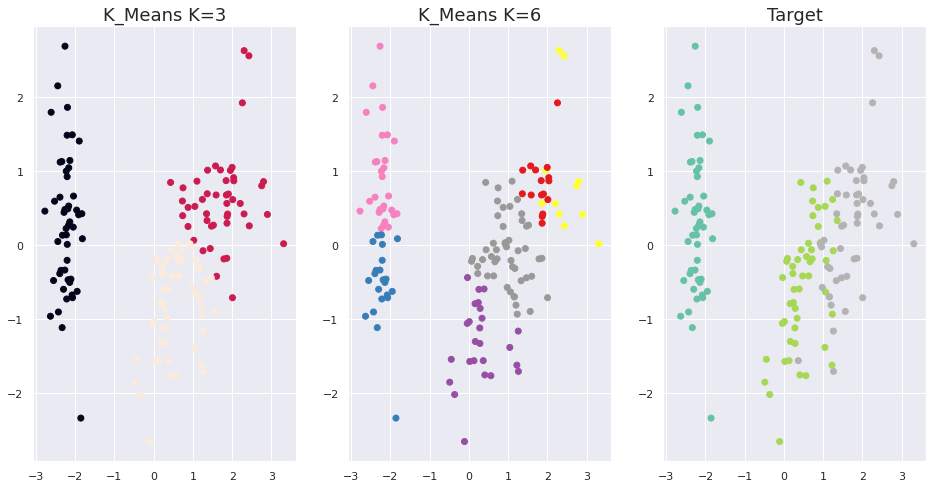

In [58]:


fig, axes = plt.subplots(1, 3, figsize=(16,8))
km0=KMeans(n_clusters=3).fit(X)
km1=KMeans(n_clusters=6).fit(X)
axes[0].scatter(Z[:,0], Z[:,1], c=km0.predict(X))
axes[1].scatter(Z[:,0], Z[:,1], c=km1.predict(X), cmap=plt.cm.Set1)
axes[2].scatter(Z[:,0], Z[:,1], c=y, cmap=plt.cm.Set2)
axes[0].set_title('K_Means K=3', fontsize=18)
axes[1].set_title('K_Means K=6', fontsize=18)
axes[2].set_title('Target', fontsize=18)

In [59]:

#Measurements with TrueLabels
#https://www.aclweb.org/anthology/D07-1043.pdf

from sklearn.metrics.cluster import homogeneity_completeness_v_measure
km0=KMeans(n_clusters=3).fit(X)
print('k=3',homogeneity_completeness_v_measure(y,km0.predict(X)))
km1=KMeans(n_clusters=6).fit(X)
print('k=6',homogeneity_completeness_v_measure(y,km1.predict(X)))

k=3 (0.6591265018049008, 0.6598476779627759, 0.659486892724918)
k=6 (0.6971297846638562, 0.43972396787117934, 0.5392860327900877)


### Question2(15pts)

Use DBscan(try with different parameters) and K-means (K=3) on IRIS Dataset and discuss/compare the results with the iris ground truth.Please provide an explanation of why K-fold cross validation is not required for the comparison among these different algorithms.

Reading Iris dataset:

In [60]:
iris = load_iris()
irisData = iris.data[:,0:2]    # work with first 2 columns so that we can visualize


irisTarget = iris.target

print("data")
print(irisData)
print("target")
print(irisTarget)

data
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5

Using DBscan:

In [61]:
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
dbscan.fit(iris.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [62]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

accuracy: 0.62


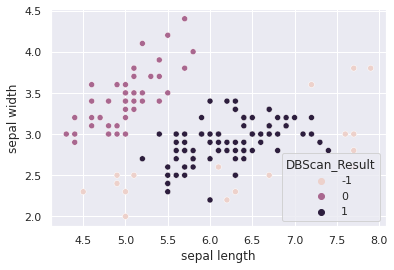

In [63]:
#visualizing the result
#making a dataframe
resultDBScan = pd.DataFrame(columns = ['sepal length', 'sepal width', 'DBScan_Result'])
resultDBScan['sepal length'] = irisData[:,0]
resultDBScan['sepal width'] = irisData[:,1]
resultDBScan['DBScan_Result'] = dbscan.labels_

print("accuracy: " + str((resultDBScan['DBScan_Result'] == irisTarget).mean()))

sns.scatterplot(x="sepal length", y="sepal width", hue="DBScan_Result", data=resultDBScan)

Let's try a couple of different parameters

accuracy: 0.35333333333333333


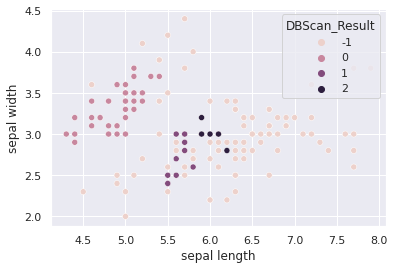

In [64]:
dbscan2 = DBSCAN(eps=0.3, metric='euclidean', min_samples=5)
dbscan2.fit(iris.data)

#visualizing the result
#making a dataframe
resultDBScan2 = pd.DataFrame(columns = ['sepal length', 'sepal width', 'DBScan_Result'])
resultDBScan2['sepal length'] = irisData[:,0]
resultDBScan2['sepal width'] = irisData[:,1]
resultDBScan2['DBScan_Result'] = dbscan2.labels_

print("accuracy: " + str((resultDBScan2['DBScan_Result'] == irisTarget).mean()))

sns.scatterplot(x="sepal length", y="sepal width", hue="DBScan_Result", data=resultDBScan2)

accuracy: 0.62


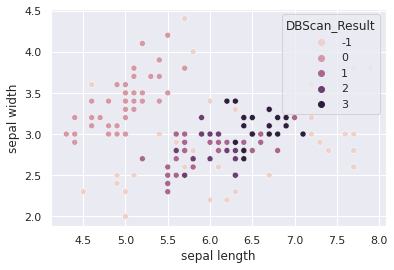

In [65]:
dbscan3 = DBSCAN(eps=0.4, metric='euclidean', min_samples=5)
dbscan3.fit(iris.data)

#visualizing the result
#making a dataframe
resultDBScan3 = pd.DataFrame(columns = ['sepal length', 'sepal width', 'DBScan_Result'])
resultDBScan3['sepal length'] = irisData[:,0]
resultDBScan3['sepal width'] = irisData[:,1]
resultDBScan3['DBScan_Result'] = dbscan3.labels_

print("accuracy: " + str((resultDBScan3['DBScan_Result'] == irisTarget).mean()))

sns.scatterplot(x="sepal length", y="sepal width", hue="DBScan_Result", data=resultDBScan3)

Using K-means:

In [66]:
#this function returns a column containing binary class, label vs the others
def getBinaryClass(data, label):
    result = []
    
    for i in range(0, len(data)):
        if data.iloc[i]['class'] == label:
            result.append(1)
        else:
            result.append(-1)
    return result

# error rate
def get_error_rate(pred, Y):
    return np.sum(np.not_equal(Y, pred))/float(Y.size)

In [67]:
iris_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
iris_data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

iris_data['binary_class'] = getBinaryClass(iris_data, "Iris-versicolor")
#1 means Iris-versicolor, -1 means other
iris_data = iris_data.drop(columns=['class'])

l = iris_data.to_numpy()
X = l[:,0:4]

accuracy: 0.09333333333333334


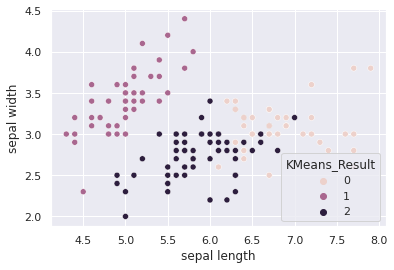

In [68]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

resutlKmeans = pd.DataFrame(columns = ['sepal length', 'sepal width', 'KMeans_Result'])
resutlKmeans['sepal length'] = irisData[:,0]
resutlKmeans['sepal width'] = irisData[:,1]
resutlKmeans['KMeans_Result'] = kmeans.labels_

print("accuracy: " + str((resutlKmeans['KMeans_Result'] == irisTarget).mean()))

sns.scatterplot(x="sepal length", y="sepal width", hue="KMeans_Result", data=resutlKmeans)

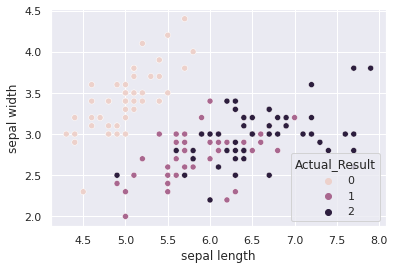

In [69]:
resutlActual = pd.DataFrame(columns = ['sepal length', 'sepal width', 'Actual_Result'])
resutlActual['sepal length'] = irisData[:,0]
resutlActual['sepal width'] = irisData[:,1]
resutlActual['Actual_Result'] = irisTarget

sns.scatterplot(x="sepal length", y="sepal width", hue="Actual_Result", data=resutlActual)

It seems that accuracy wise DBscan is working better for some parameters than K-means in this example. DBscan is giving different results depending on the parameters. But the output of DBscan makes sense since DBscan is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions. From the graphs, we can see that, both K-means and DBscan(for some parameters) are able to separate the linearly separable classes.

In supervised learning, there is always a clear definition of error that quantifies how well we are predicting the output. And we can use cross validation to obtain an estimate of the out-of-sample error of a model. However, in unsupervised learning, such as clustering, there is usually no clear definition of "error". Due to this reason, we cannot really use cross validation in this scenario.

The k-fold cross validation can be defined in the supervised learning. Because in supervised learning, it is always easy to understand the model how much correctly it quantifies f(X) for an approximation of y. For this, we can use cross validation to get an estimate of the generalization error of a model. So, this cross validation can be used in supervised learning for model selection.

But in unsupervised learning, such as clustering, there is usually no clear definition of error. For this reason, cross-validation cannot be used for this purpose. However, there are some methods (Two methods: extrinsic vs. intrinsic) that determine the quality of clustering like Silhouette coefficient, Calisnki-Harabasz coefficient, Hartigan index etc.

Basically, we do clustering the data in the feature space. So, we can look at the intra-cluster variance and the inter-cluster variances.

### Extra credit (5pts)

Implement DBScanby using the KD-tree (you can use for the  KD-tree the implementation in scikit or Numpy). Note that the KD-tree is used for  K-nearest neighbor.

In [70]:
class MyDBSCAN:
    def __init__(self,eps,min_samples):
        self.eps = eps
        self.min_samples = min_samples
    def fit(self,X):
        n,_ = X.shape
        kdtree = scipy.spatial.KDTree(X)
        visites = np.zeros((n,1),dtype=bool)
        clusters = np.zeros((n,1))
        c = 0
        for i in range(n):
            if visites[i]==0: #Not visited
                neighbour = kdtree.query_ball_point(X[i,:],self.eps)
                visites[i] = 1
                if len(neighbour)<self.min_samples:
                    clusters[i] = -1
                else:
                    c = c+1
                    clusters[i] = c
                    while len(neighbour)>0: #Studying all the neighbour of created cluster
                        l = neighbour.pop() #
                        if visites[l]==0:
                            visites[l] = 1 #mark this as visited
                            if len(kdtree.query_ball_point(X[l,:],self.eps))>=self.min_samples:
                                neighbour.extend(kdtree.query_ball_point(X[l,:],self.eps))
                        if clusters[l]<=0:
                            clusters[l] = c

        return clusters

In [71]:
irisData = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
irisData.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

#work with 2 columns for visibility
irisData = irisData.drop(columns=['petal length'])
irisData = irisData.drop(columns=['petal width'])
irisData

,sepal length,sepal width,class
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [72]:
#testing
dbscan = MyDBSCAN(eps =.1,min_samples=3)

output = dbscan.fit(irisData.iloc[:, [0,1]].to_numpy())

output = output.tolist()

outputInt = []
for i in range(0, len(output)):
    outputInt.append(int(round(output[i][0])))

(unique, counts) = np.unique(outputInt, return_counts=True)
print(unique)
print(counts)

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[98  4  3  3  4  3  3  3  4  7  5  3  4  3  3]


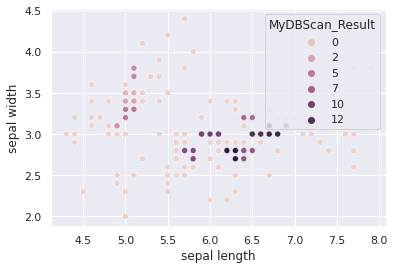

In [73]:
#visualization
resultMyDBScan = pd.DataFrame(columns = ['sepal length', 'sepal width', 'MyDBScan_Result'])
resultMyDBScan['sepal length'] = irisData['sepal length']
resultMyDBScan['sepal width'] = irisData['sepal width']
resultMyDBScan['MyDBScan_Result'] = outputInt

sns.scatterplot(x="sepal length", y="sepal width", hue="MyDBScan_Result", data=resultMyDBScan)